In [1]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn import preprocessing


from sklearn.ensemble import RandomForestClassifier
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn.metrics import accuracy_score,f1_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
%pwd

'C:\\Users\\Iris'

In [3]:
path='C:\\Users\\Iris'

In [4]:
df = pd.read_csv(f'{path}/pima-indians-diabetes(2).data',header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
#Question 1 (a)
#Scaling the dataframe
scaler = preprocessing.MinMaxScaler()##
min_max_scaler = preprocessing.MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [6]:
#Scaling 8 columns
df_scale=scaleColumns(df,[0,1,2,3,4,5,6,7])
df_scale

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [7]:
#Separate out X and Y

X = df_scale.iloc[:, :8]
Y = df_scale.iloc[:, 8:9]

In [8]:
#Question 1(b)
# Train-Validation- Test Split
#Using train_test_split twice to get the Train-val-test-split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=1)
(X_train,X_val,Y_train,Y_val) = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)
print(X_train.shape,X_test.shape,X_val.shape,Y_train.shape,Y_test.shape,Y_val.shape)

(460, 8) (154, 8) (154, 8) (460, 1) (154, 1) (154, 1)


In [14]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [15]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Fit the DNN with train data
#Since the train dataset is 460 rows now, the epochs only needs to be 92

history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=92, batch_size=5)

Epoch 1/92
92/92 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.6413 - val_loss: 0.6788 - val_accuracy: 0.6558
Epoch 2/92
92/92 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.6522 - val_loss: 0.6571 - val_accuracy: 0.6558
Epoch 3/92
92/92 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.6522 - val_loss: 0.6493 - val_accuracy: 0.6558
Epoch 4/92
92/92 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.6522 - val_loss: 0.6467 - val_accuracy: 0.6558
Epoch 5/92
92/92 [==============================] - 0s 914us/step - loss: 0.6485 - accuracy: 0.6522 - val_loss: 0.6431 - val_accuracy: 0.6558
Epoch 6/92
92/92 [==============================] - 0s 916us/step - loss: 0.6450 - accuracy: 0.6522 - val_loss: 0.6393 - val_accuracy: 0.6558
Epoch 7/92
92/92 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.6522 - val_loss: 0.6347 - val_accuracy: 0.6558
Epoch 8/92
92/92

Epoch 59/92
92/92 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7652 - val_loss: 0.5050 - val_accuracy: 0.7597
Epoch 60/92
92/92 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7804 - val_loss: 0.5044 - val_accuracy: 0.7727
Epoch 61/92
92/92 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7783 - val_loss: 0.5049 - val_accuracy: 0.7662
Epoch 62/92
92/92 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7783 - val_loss: 0.5081 - val_accuracy: 0.7597
Epoch 63/92
92/92 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.7739 - val_loss: 0.5045 - val_accuracy: 0.7662
Epoch 64/92
92/92 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.7761 - val_loss: 0.5062 - val_accuracy: 0.7532
Epoch 65/92
92/92 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.7804 - val_loss: 0.5068 - val_accuracy: 0.7532
Epoch 66/92
9

In [17]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

5/5 [==============================] - 0s 24ms/step - loss: 0.4732 - accuracy: 0.7987
Accuracy: 79.87%


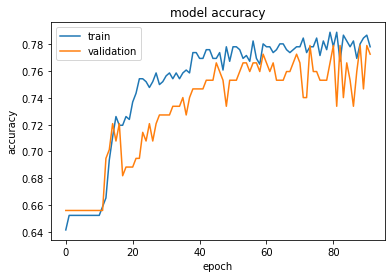

In [18]:
#Question 1 (c)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
#Make a prediction using DNN model
y_pred=model.predict(X_test)


In [20]:
#Question 1 (d)
#Report results using nice ROC curves, report AUC values.
rec, fall_out, thresholds = roc_curve(Y_test,y_pred)

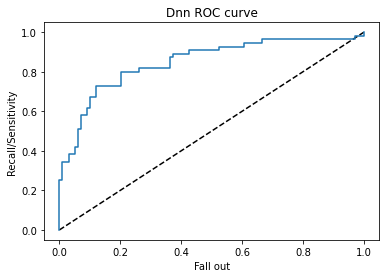

In [21]:
#Report results using nice ROC curves, report AUC values.
plt.plot([0,1],[0,1],'k--')
plt.plot(rec,fall_out, label='DNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('Dnn ROC curve')
plt.show()

In [22]:
#Report results using nice ROC curves, report AUC values.
#Area under ROC curve
roc_auc_score(Y_test,y_pred)

0.8477502295684114

In [23]:
#Question 1(e)
#Try with resample using smote
over = SMOTE(random_state=42)
# transform the dataset
X_tr, Y_tr = over.fit_resample(X_train, Y_train)
print(X_tr,Y_tr)


            0         1         2         3         4         5         6  \
0    0.058824  0.457286  0.442623  0.252525  0.118203  0.375559  0.066610   
1    0.588235  0.743719  0.688525  0.484848  0.280142  0.560358  0.394108   
2    0.117647  0.462312  0.508197  0.282828  0.000000  0.470939  0.022203   
3    0.294118  0.683417  0.688525  0.414141  0.104019  0.521610  0.088813   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
595  0.074424  0.626808  0.448964  0.371895  0.209312  0.494693  0.367603   
596  0.000000  0.589909  0.646950  0.000000  0.000000  0.490093  0.133841   
597  0.174883  0.887270  0.701378  0.292356  0.179420  0.496837  0.452764   
598  0.058824  0.622215  0.454946  0.372275  0.192288  0.506819  0.332136   
599  0.294118  0.572607  0.608327  0.290748  0.000000  0.486680  0.235507   

            7  
0    0.033333  
1    0.500000  
2    0.050000  
3    0.2333

In [67]:
# Fit the DNN with the resampling train data
#Since the train dataset is 600 rows now, the epochs only needs to be 120

history_tr=model.fit(X_tr, Y_tr, validation_data=(X_val, Y_val), epochs=120, batch_size=5)

Epoch 1/120
120/120 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8183 - val_loss: 0.5600 - val_accuracy: 0.7468
Epoch 2/120
120/120 [==============================] - 0s 969us/step - loss: 0.4218 - accuracy: 0.8100 - val_loss: 0.5754 - val_accuracy: 0.7403
Epoch 3/120
120/120 [==============================] - 0s 949us/step - loss: 0.4199 - accuracy: 0.8117 - val_loss: 0.5824 - val_accuracy: 0.7338
Epoch 4/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8117 - val_loss: 0.5734 - val_accuracy: 0.7403
Epoch 5/120
120/120 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8000 - val_loss: 0.6136 - val_accuracy: 0.7078
Epoch 6/120
120/120 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8133 - val_loss: 0.6138 - val_accuracy: 0.7143
Epoch 7/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8200 - val_loss: 0.5835 - val_accuracy: 0.

Epoch 56/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8183 - val_loss: 0.5978 - val_accuracy: 0.7273
Epoch 57/120
120/120 [==============================] - 0s 823us/step - loss: 0.4192 - accuracy: 0.8133 - val_loss: 0.5892 - val_accuracy: 0.7208
Epoch 58/120
120/120 [==============================] - 0s 806us/step - loss: 0.4207 - accuracy: 0.8150 - val_loss: 0.5838 - val_accuracy: 0.7403
Epoch 59/120
120/120 [==============================] - 0s 898us/step - loss: 0.4197 - accuracy: 0.8167 - val_loss: 0.5945 - val_accuracy: 0.7208
Epoch 60/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8200 - val_loss: 0.5968 - val_accuracy: 0.7208
Epoch 61/120
120/120 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8200 - val_loss: 0.5950 - val_accuracy: 0.7273
Epoch 62/120
120/120 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8050 - val_loss: 0.6261 - val_acc

120/120 [==============================] - 0s 773us/step - loss: 0.4185 - accuracy: 0.8083 - val_loss: 0.5634 - val_accuracy: 0.7273
Epoch 113/120
120/120 [==============================] - 0s 914us/step - loss: 0.4144 - accuracy: 0.8150 - val_loss: 0.5587 - val_accuracy: 0.7273
Epoch 114/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8033 - val_loss: 0.5988 - val_accuracy: 0.7208
Epoch 115/120
120/120 [==============================] - 0s 864us/step - loss: 0.4161 - accuracy: 0.8150 - val_loss: 0.5891 - val_accuracy: 0.7273
Epoch 116/120
120/120 [==============================] - 0s 755us/step - loss: 0.4213 - accuracy: 0.8050 - val_loss: 0.5948 - val_accuracy: 0.7208
Epoch 117/120
120/120 [==============================] - 0s 696us/step - loss: 0.4160 - accuracy: 0.8100 - val_loss: 0.5955 - val_accuracy: 0.7208
Epoch 118/120
120/120 [==============================] - 0s 856us/step - loss: 0.4183 - accuracy: 0.8083 - val_loss: 0.5446 - val_accu

In [68]:
# Evaluate the model
#The accuracy goes down for a bit after we resample
scores_tr = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores_tr[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.7403
Accuracy: 74.03%


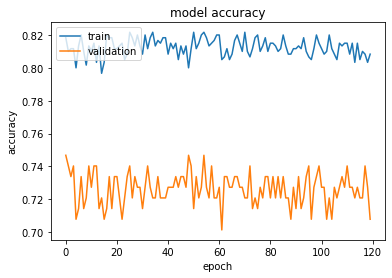

In [69]:
plt.plot(history_tr.history['accuracy'])
plt.plot(history_tr.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [70]:
#Make a prediction using DNN model
y_pred_tr=model.predict(X_test)
#Report results using nice ROC curves, report AUC values.
rec_tr, fall_out_tr, thresholds_tr = roc_curve(Y_test,y_pred_tr)

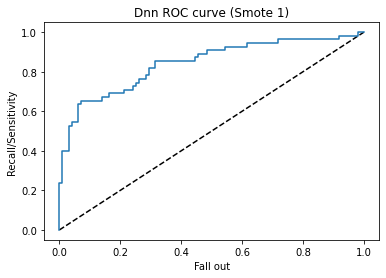

In [71]:
#Report results using nice ROC curves, report AUC values.
plt.plot([0,1],[0,1],'k--')
plt.plot(rec_tr,fall_out_tr, label='DNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('Dnn ROC curve (Smote 1)')
plt.show()

In [72]:
#Report results using nice ROC curves, report AUC values.
#Area under ROC curve
roc_auc_score(Y_test,y_pred_tr)
#Also the accuracy of the model goes down than the original one, but the resample model has larger area under curve than the original.

0.842791551882461

In [50]:
#Question 1(e)
#Resampling with smote
#Question 1(e)
#Try with resample using smote
over = SMOTE(random_state=5)
# transform the dataset
X_tr1, Y_tr1 = over.fit_resample(X_train, Y_train)
print(X_tr,Y_tr)

            0         1         2         3         4         5         6  \
0    0.058824  0.457286  0.442623  0.252525  0.118203  0.375559  0.066610   
1    0.588235  0.743719  0.688525  0.484848  0.280142  0.560358  0.394108   
2    0.117647  0.462312  0.508197  0.282828  0.000000  0.470939  0.022203   
3    0.294118  0.683417  0.688525  0.414141  0.104019  0.521610  0.088813   
4    0.000000  0.688442  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
595  0.074424  0.626808  0.448964  0.371895  0.209312  0.494693  0.367603   
596  0.000000  0.589909  0.646950  0.000000  0.000000  0.490093  0.133841   
597  0.174883  0.887270  0.701378  0.292356  0.179420  0.496837  0.452764   
598  0.058824  0.622215  0.454946  0.372275  0.192288  0.506819  0.332136   
599  0.294118  0.572607  0.608327  0.290748  0.000000  0.486680  0.235507   

            7  
0    0.033333  
1    0.500000  
2    0.050000  
3    0.2333

In [61]:
# Fit the DNN with the resampling train data
#Since the train dataset is 600 rows now, the epochs only needs to be 120

history_tr1=model.fit(X_tr1, Y_tr1, validation_data=(X_val, Y_val), epochs=120, batch_size=5)

Epoch 1/120
120/120 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8083 - val_loss: 0.5566 - val_accuracy: 0.7208
Epoch 2/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.7950 - val_loss: 0.5586 - val_accuracy: 0.7273
Epoch 3/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.7933 - val_loss: 0.5796 - val_accuracy: 0.7208
Epoch 4/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8000 - val_loss: 0.5539 - val_accuracy: 0.7208
Epoch 5/120
120/120 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8017 - val_loss: 0.5744 - val_accuracy: 0.7338
Epoch 6/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.8000 - val_loss: 0.5443 - val_accuracy: 0.7273
Epoch 7/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.7950 - val_loss: 0.5867 - val_accuracy: 0.7143

Epoch 58/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8067 - val_loss: 0.5543 - val_accuracy: 0.7403
Epoch 59/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8033 - val_loss: 0.6282 - val_accuracy: 0.6883
Epoch 60/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8067 - val_loss: 0.5706 - val_accuracy: 0.7338
Epoch 61/120
120/120 [==============================] - 0s 981us/step - loss: 0.4164 - accuracy: 0.8000 - val_loss: 0.5528 - val_accuracy: 0.7338
Epoch 62/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.7933 - val_loss: 0.5859 - val_accuracy: 0.7338
Epoch 63/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8033 - val_loss: 0.5667 - val_accuracy: 0.7338
Epoch 64/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8017 - val_loss: 0.5907 - val_accurac

120/120 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8033 - val_loss: 0.5607 - val_accuracy: 0.7532
Epoch 115/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8083 - val_loss: 0.5958 - val_accuracy: 0.7208
Epoch 116/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8067 - val_loss: 0.5976 - val_accuracy: 0.7208
Epoch 117/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8033 - val_loss: 0.5587 - val_accuracy: 0.7468
Epoch 118/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8017 - val_loss: 0.5890 - val_accuracy: 0.7273
Epoch 119/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8050 - val_loss: 0.5832 - val_accuracy: 0.7273
Epoch 120/120
120/120 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8017 - val_loss: 0.5793 - val_accuracy: 0.7338

In [62]:
# Evaluate the model
#The accuracy goes down for a bit after we resample
scores_tr1 = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores_tr1[1]*100))

5/5 [==============================] - 0s 997us/step - loss: 0.5083 - accuracy: 0.7532
Accuracy: 75.32%


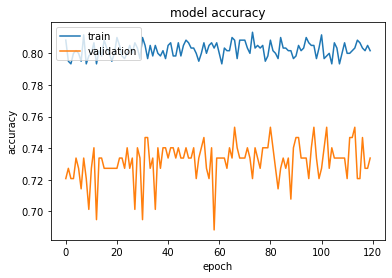

In [63]:
plt.plot(history_tr1.history['accuracy'])
plt.plot(history_tr1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#With lower smoto(randam_state value) the accuracty is a bit different.

In [64]:
#Make a prediction using DNN model
y_pred_tr1=model.predict(X_test)
#Report results using nice ROC curves, report AUC values.
rec_tr1, fall_out_tr1, thresholds_tr1 = roc_curve(Y_test,y_pred_tr1)

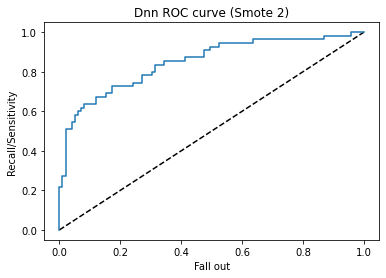

In [65]:
#Report results using nice ROC curves, report AUC values.
plt.plot([0,1],[0,1],'k--')
plt.plot(rec_tr1,fall_out_tr1, label='DNN')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('Dnn ROC curve (Smote 2)')
plt.show()

In [66]:
#Report results using nice ROC curves, report AUC values.
#Area under ROC curve
roc_auc_score(Y_test,y_pred_tr1)

0.8484848484848484

In [29]:
#Question2 taking a price.csv from https://www.kaggle.com/zillow/rent-index
#Let x be every columns except January 2017, y be January 2017. Using x to predict y
price_df=pd.read_csv(f'{path}/price.csv')

In [30]:
price_df.head(5)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


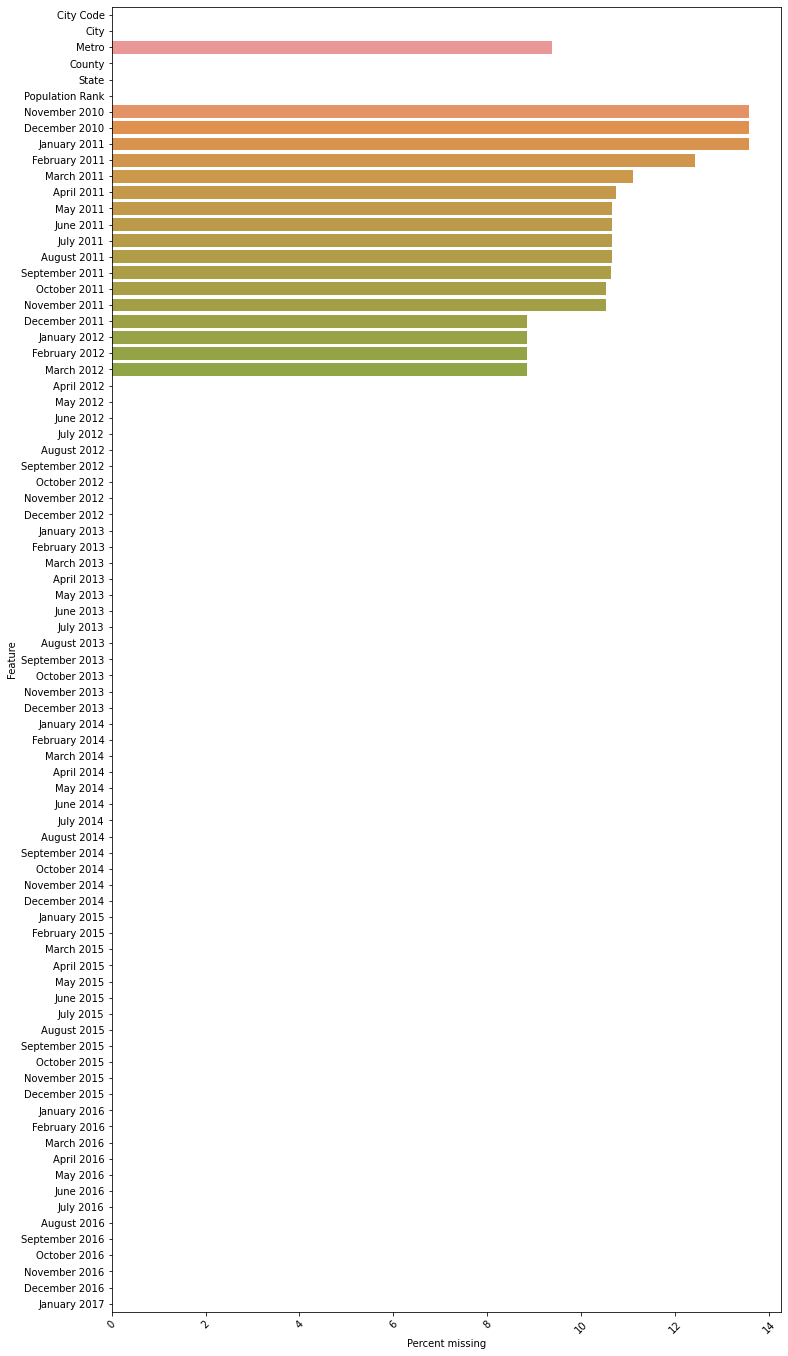

In [31]:
#See how many null values in the dataset by using a bar chart

null_vals = price_df.isnull().sum()/len(price_df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (12,24))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [32]:
#Split the data first, because the data is too large we are only use 3000 rows for testing and prediction
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]

price_df2,price_df_noinused=mydf_splitter(price_df,3000)

In [34]:
#Defined some functions
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [33]:
#Define a function to convert object types and string types to category type

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

price_df3 = str_to_cat(price_df2)

In [35]:
# Filled the null values in dataset
price_df4, my_table=mydf_preprocessor(price_df3,null_table = None)
price_df4

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,June 2011_na,July 2011_na,August 2011_na,September 2011_na,October 2011_na,November 2011_na,December 2011_na,January 2012_na,February 2012_na,March 2012_na
0,6181,1527,354,549,35,1,1297.0,1300.0,1307.0,1303.0,...,True,True,True,True,True,True,False,False,False,False
1,12447,1254,290,396,5,2,2184.0,2184.0,2183.0,2188.0,...,False,False,False,False,False,False,False,False,False,False
2,17426,374,95,153,15,3,1563.0,1555.0,1547.0,1537.0,...,False,False,False,False,False,False,False,False,False,False
3,39051,1014,236,285,44,4,1198.0,1199.0,1199.0,1200.0,...,False,False,False,False,False,False,False,False,False,False
4,13271,1746,391,521,39,5,1092.0,1099.0,1094.0,1087.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,42766,1870,0,494,49,2996,844.0,844.0,857.0,867.0,...,False,False,False,False,False,False,False,False,False,False
2996,398578,2276,58,652,31,2997,1727.0,1723.0,1721.0,1728.0,...,False,False,False,False,False,False,False,False,False,False
2997,20307,1952,274,138,23,2998,1297.0,1300.0,1307.0,1303.0,...,True,True,True,True,True,True,True,True,True,True
2998,53876,1747,12,711,32,2999,1527.0,1519.0,1503.0,1477.0,...,False,False,False,False,False,False,False,False,False,False


In [36]:
#Question 2 using random forest to predict
#Let the y_value be "January 2017", and use other colunms to predict it
x=price_df4.drop("January 2017",axis=1)
y=price_df4["January 2017"]

In [37]:
#split the x, y into x_test, y_test,x_val,y_val x_train, and y_train
x_trn, x_val, y_trn, y_val = train_test_split(x, y, test_size=0.2, random_state=1)
x_trn, x_tst, y_trn, y_tst = train_test_split(x_trn,y_trn, test_size=0.25, random_state=1)
print(x_trn.shape,x_val.shape,x_tst.shape,y_trn.shape,y_val.shape,y_tst.shape)

(1800, 97) (600, 97) (600, 97) (1800,) (600,) (600,)


In [38]:
#Using Random Forest to predict price_df
#We have the accuracy score be 0.005.
mod_1 = RandomForestClassifier(n_jobs = -1, n_estimators = 2,
                               bootstrap = True)
mod_1.fit(x_trn,y_trn)
y_prd1 = mod_1.predict(x_val)
accuracy_score(y_val,y_prd1)

0.005

In [39]:
#Make a prediction using Random Forest model
# We have the accuracy score 018333333333333333 for random Forest model
y_prd_rf=mod_1.predict(x_tst)
ac_rf=accuracy_score(y_tst,y_prd_rf)
print(ac_rf)

0.018333333333333333


In [40]:
#Using DNN to predict price_df
X_price = price_df3.iloc[:, :80]
Y_price = price_df3.iloc[:, 80:81]

In [41]:
# Train-Validation- Test Split
#Using train_test_split twice to get the Train-val-test-split
(X_train_price, X_test_price, Y_train_price, Y_test_price) = train_test_split(X_price, Y_price, test_size=0.2, random_state=1)
(X_train_price,X_val_price,Y_train_price,Y_val_price) = train_test_split(X_train_price, Y_train_price, test_size=0.25, random_state=1)
print(X_train_price.shape,X_test_price.shape,X_val_price.shape,Y_train_price.shape,Y_test_price.shape,Y_val_price.shape)

(1800, 80) (600, 80) (600, 80) (1800, 1) (600, 1) (600, 1)


In [42]:
# Build the deep neural network
model_price = Sequential()
model_price.add(Dense(10, input_dim=80, kernel_initializer='uniform', activation='relu'))
model_price.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model_price.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [43]:
# Compile the DNN

model_price.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
# Fit the DNN with train data

histroy_price=model_price.fit(X_train_price, Y_train_price, validation_data=(X_val_price, Y_val_price), epochs=10,  batch_size=180)

Epoch 1/10
10/10 [==============================] - 0s 18ms/step - loss: -30191.9375 - accuracy: 0.0000e+00 - val_loss: -72747.5234 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: -99568.0391 - accuracy: 0.0000e+00 - val_loss: -186690.0469 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: -241523.7344 - accuracy: 0.0000e+00 - val_loss: -429789.8750 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: -540221.5625 - accuracy: 0.0000e+00 - val_loss: -920331.5000 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: -1113692.0000 - accuracy: 0.0000e+00 - val_loss: -1827468.1250 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: -2141410.0000 - accuracy: 0.0000e+00 - val_loss: -3337508.7500 - val_accuracy: 0.0000e+00
Epoch 7/10
10/10 [====================

In [45]:
# Evaluate the model
#We have accuracy be 0.00% for DNN Model
scores_price = model_price.evaluate(X_test_price, Y_test_price)
print ("Accuracy: %.2f%%" %(scores_price[1]*100))

#It may because of the dataset I choose, the DNN model does not do so well in prediction than the Random Forest Model does.

19/19 [==============================] - 0s 639us/step - loss: -20801886.0000 - accuracy: 0.0000e+00
Accuracy: 0.00%


In [46]:
#Make a prediction using DNN model
y_pred_price=model_price.predict(X_test_price)

In [47]:
#Using Random Forest to predict price_df and use the train data and valid data from DNN model
#We have the accuracy score be 0.005.
mod_2 = RandomForestClassifier(n_jobs = -1, n_estimators = 2,
                               bootstrap = True)
mod_2.fit(X_train_price,Y_train_price)
y_prd2 = mod_2.predict(X_val_price)
accuracy_score(Y_val_price,y_prd2)

<ipython-input-47-ab2d537a5e62>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod_2.fit(X_train_price,Y_train_price)


0.005

In [48]:
#Make a prediction using Random Forest model
# We have the accuracy score 0.006666666666666667
y_prd_rf1=mod_2.predict(X_test_price)
ac_rf1=accuracy_score(Y_test_price,y_prd_rf1)
print(ac_rf1)
#It seems like random forest model are doing better job in prediction for dataset like price.csv . 

0.006666666666666667
